# **ModelPrediction**

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, recall_score, precision_score, confusion_matrix
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Credit scoring/precredit_test.csv')
df.head()

,NULL,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260


## **1. Value Encoding**  
- This step is for preparing the dataset to be ready feature selected and modelled

In [4]:
# INCOME TYPE
df_new = df.copy()
df_new = df_new.dropna(axis=0)
incometype_dict = {'Working': 1, 'Commercial associate': 2, 'Pensioner': 3, 
                   'State servant': 4, 'Unemployed':5}
                   
df_new['income_type_ord'] = df['INCOME_TYPE'].map(incometype_dict)
df_new[['income_type_ord', 'INCOME_TYPE']].head(3)

,income_type_ord,INCOME_TYPE
2,1,Working
3,1,Working
6,1,Working


In [5]:
### EDUCATION BACKGROUND
education_dict = {'Secondary / secondary special': 1, 'Higher education': 2, 'Incomplete higher': 3, 'Lower secondary': 4, 'Academic degree': 5}
df_new['education_ord'] = df['EDUCATION'].map(education_dict)
df_new[['education_ord', 'EDUCATION']].head(3)

,education_ord,EDUCATION
2,1,Secondary / secondary special
3,1,Secondary / secondary special
6,1,Secondary / secondary special


## **2. Handling Imbalanced Target - SMOTE Oversampling**

In [6]:
x = df_new[['income_type_ord', 'education_ord', 'DAYS_AGE', 'DAYS_WORK', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3']]
y = df_new['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

## **3. Prediction and Evaluation Metrix**

In [8]:
x_train_sm.shape

(7866, 7)

In [9]:
y_train_sm.shape

(7866,)

### **Neural Network**

In [ ]:
from tensorflow.keras.layers import Dropout
model = Sequential()
# model.add(Dropout(0.2, input_shape=(7,)))
model.add(Dense(60, input_dim=7, activation='sigmoid'))  # units = 12 => Positive integer, dimensionality of the output space.
model.add(Dropout(0.4))
model.add(Dense(30, activation='relu'))                  # units = 8
model.add(Dropout(0.4))
model.add(Dense(30, activation='sigmoid'))               # units = 8
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))                # units = 1

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x_train_sm, y_train_sm, test_size = 0.2, random_state = 0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=20, batch_size=5, validation_data=(X_val,y_val))

# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)

Epoch 1/20
1259/1259 [==============================] - 4s 3ms/step - loss: 0.7232 - accuracy: 0.5180 - val_loss: 0.6929 - val_accuracy: 0.4981
Epoch 2/20
1259/1259 [==============================] - 3s 3ms/step - loss: 0.7016 - accuracy: 0.4971 - val_loss: 0.6900 - val_accuracy: 0.5152
Epoch 3/20
1259/1259 [==============================] - 3s 2ms/step - loss: 0.6955 - accuracy: 0.5141 - val_loss: 0.6902 - val_accuracy: 0.5591
Epoch 4/20
1259/1259 [==============================] - 3s 3ms/step - loss: 0.6942 - accuracy: 0.5124 - val_loss: 0.6902 - val_accuracy: 0.5540
Epoch 5/20
1259/1259 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5087 - val_loss: 0.6920 - val_accuracy: 0.5191
Epoch 6/20
1259/1259 [==============================] - 3s 3ms/step - loss: 0.6918 - accuracy: 0.5202 - val_loss: 0.6907 - val_accuracy: 0.5216
Epoch 7/20
1259/1259 [==============================] - 3s 2ms/step - loss: 0.6935 - accuracy: 0.5135 - val_loss: 0.6910 - val_accuracy:

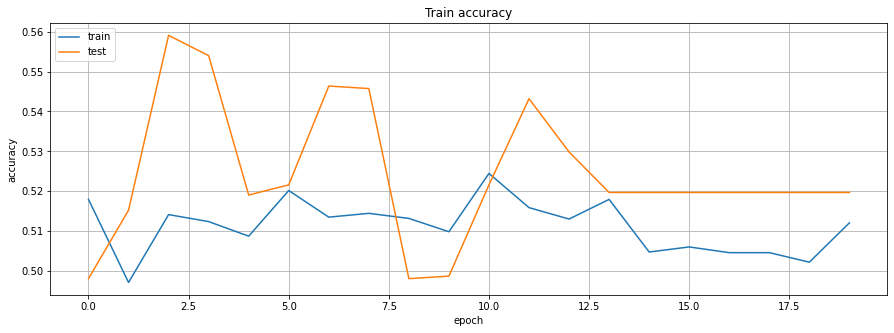

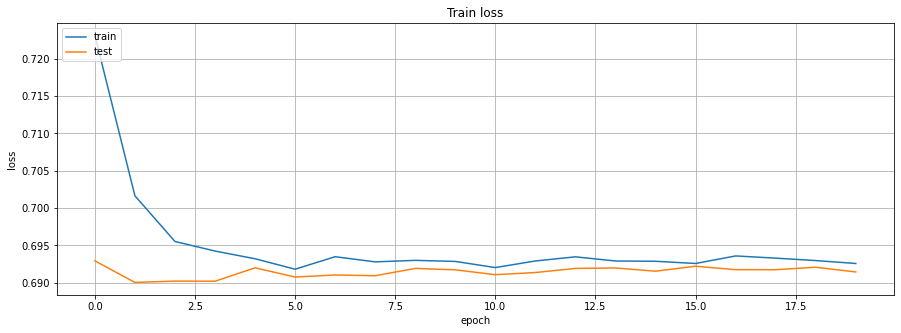

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 60)                480       
                                                                 
 dropout_5 (Dropout)         (None, 60)                0         
                                                                 
 dense_19 (Dense)            (None, 30)                1830      
                                                                 
 dropout_6 (Dropout)         (None, 30)                0         
                                                                 
 dense_20 (Dense)            (None, 30)                930       
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                

In [ ]:
print('Accuracy: %.2f' ,(accuracy[1]))
print("loss",accuracy[0])

Accuracy: %.2f 0.5119199156761169
loss 0.6922478079795837


In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)
auc = roc_auc_score(y_test, predictions)
print('AUC: %.2f' % auc)
print(predictions)
print(type(predictions))
print(predictions.shape)
# predictions = predictions.tolist()
print(pd.DataFrame(predictions).value_counts())

AUC: 0.50
[0 0 0 ... 0 0 0]
<class 'numpy.ndarray'>
(1058,)
0    1058
dtype: int64


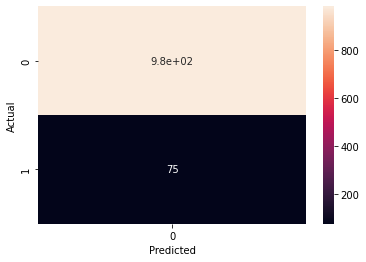

In [ ]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)

In [ ]:
accuracy = model.evaluate(x_train_sm, y_train_sm)

246/246 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5135


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       983
           1       0.00      0.00      0.00        75

    accuracy                           0.93      1058
   macro avg       0.46      0.50      0.48      1058
weighted avg       0.86      0.93      0.89      1058



In [ ]:
pd.DataFrame(data = [accuracy_score(y_test, predictions)*100, 
                     recall_score(y_test, predictions)*100, 
                     precision_score(y_test, predictions)*100, 
                     roc_auc_score(y_test, predictions)*100, 
                     f1_score(y_test, predictions)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,92.911153
recall,0.000000
precision,0.000000
roc_auc_score,50.000000
f1_score,0.000000


### **Random Forrest**

#### **Random Forrest Without Tuning**

In [ ]:
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [ ]:
y_pred_RFC = model_RFC.predict(x_test)
y_pred_RFC

array([1, 0, 0, ..., 0, 0, 0])

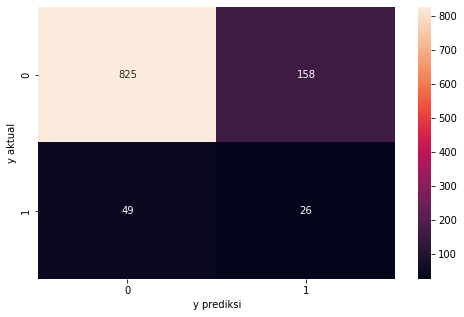

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

In [ ]:
# confusion matrix report
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       983
           1       0.14      0.35      0.20        75

    accuracy                           0.80      1058
   macro avg       0.54      0.59      0.54      1058
weighted avg       0.89      0.80      0.84      1058



In [ ]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_RFC)*100, 
                     recall_score(y_test, y_pred_RFC)*100, 
                     precision_score(y_test, y_pred_RFC)*100, 
                     roc_auc_score(y_test, y_pred_RFC)*100, 
                     f1_score(y_test, y_pred_RFC)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

,Score (%)
accuracy,80.434783
recall,34.666667
precision,14.130435
roc_auc_score,59.296711
f1_score,20.077220


### **Artificial Neural Network Model**

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [145]:
def create_model():
    model = Sequential()
    # model.add(Dense(256,activation='relu',input_shape=[7]))
    # model.add(Dropout(0.2))
    # model.add(Dense(256,activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(128,activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(64,activation='relu'))
    # model.add(Dropout(0.2))
    # model.add(Dense(64,activation='relu'))
    # model.add(Dropout(0.1))
    # model.add(Dense(1,activation='sigmoid'))

    model.add(Dense(256,activation='relu',input_shape=[7]))
    model.add(Dropout(0.8))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.8))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))

    model.compile( optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [146]:
classifier = create_model()
classifier.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 256)               2048      
                                                                 
 dropout_95 (Dropout)        (None, 256)               0         
                                                                 
 dense_121 (Dense)           (None, 256)               65792     
                                                                 
 dropout_96 (Dropout)        (None, 256)               0         
                                                                 
 dense_122 (Dense)           (None, 128)               32896     
                                                                 
 dropout_97 (Dropout)        (None, 128)               0         
                                                                 
 dense_123 (Dense)           (None, 64)              

In [147]:
early_stopping = EarlyStopping(patience = 20, min_delta = 0.001, restore_best_weights =True )

In [150]:
history  = classifier.fit(x_train_sm,
                          y_train_sm,
                          epochs=11,
                          validation_split=0.25,
                          callbacks=[early_stopping],
                          verbose=1)

Epoch 1/11
185/185 [==============================] - 1s 7ms/step - loss: 214.3586 - accuracy: 0.5336 - val_loss: 0.4556 - val_accuracy: 0.9176
Epoch 2/11
185/185 [==============================] - 1s 6ms/step - loss: 179.3786 - accuracy: 0.3835 - val_loss: 0.5586 - val_accuracy: 1.0000
Epoch 3/11
185/185 [==============================] - 1s 6ms/step - loss: 153.3437 - accuracy: 0.3663 - val_loss: 2.4108 - val_accuracy: 0.9176
Epoch 4/11
185/185 [==============================] - 1s 6ms/step - loss: 138.8416 - accuracy: 0.5887 - val_loss: 2.2695 - val_accuracy: 0.0000e+00
Epoch 5/11
185/185 [==============================] - 1s 6ms/step - loss: 72.7803 - accuracy: 0.6535 - val_loss: 0.8284 - val_accuracy: 0.0000e+00
Epoch 6/11
185/185 [==============================] - 1s 6ms/step - loss: 65.0152 - accuracy: 0.6562 - val_loss: 0.8868 - val_accuracy: 0.0000e+00
Epoch 7/11
185/185 [==============================] - 1s 7ms/step - loss: 68.9826 - accuracy: 0.6591 - val_loss: 0.9349 - val_

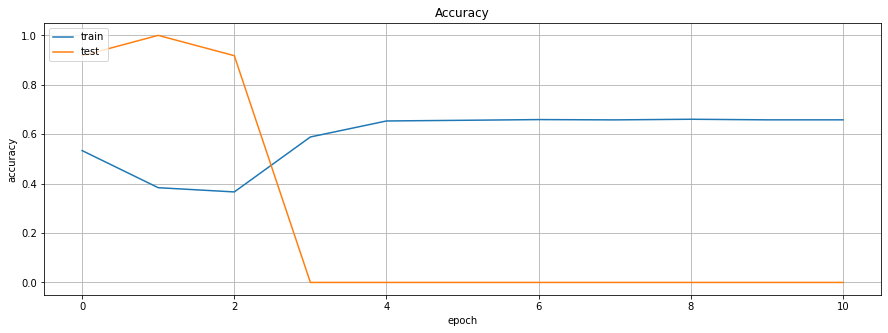

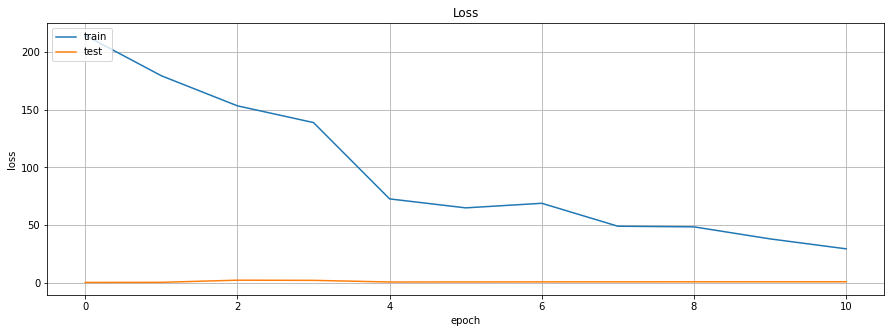

In [151]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [154]:
y_pred = classifier.predict(x_test)

In [155]:
for i in range(len(y_pred)):
    if y_pred[i] > 0.5 :
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [156]:
columns = ['Model','accuracy score', ' Precision','Recall','f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

,Model,accuracy score,Precision,Recall,f1_score


In [157]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('--------------------------------------------------------------------------')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    print(f'accuracy score :{accuracy_score}') 

    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
    # save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name,accuracy_score,precision_score,recall_score, f1_score]
    
    Plot_confusion_matrix(y_test,y_pred,model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test,pred_prob,model_name,accuracy_score)

In [158]:
# Created a common function to plot confusion matrix
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent','Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

ANN 
--------------------------------------------------------------------------
accuracy score :0.9291115311909263
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       983
           1       0.00      0.00      0.00        75

    accuracy                           0.93      1058
   macro avg       0.46      0.50      0.48      1058
weighted avg       0.86      0.93      0.89      1058



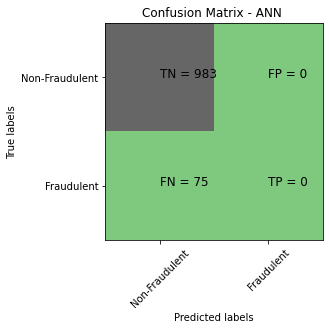

In [159]:
print_results("ANN ", y_test, y_pred)

In [161]:
acc = accuracy_score(y_test, y_pred)
f1 =  f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
confusion_metrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
value_counts = pd.DataFrame(y_pred).value_counts()

print('classification_report')
print(classification_report(y_test, y_pred))
print('test acc = ', acc)
print('test f1-score = ', f1)
print('test precision-score = ', precision)
print('test recall-score = ', recall)
print('test confusion metric = ',confusion_metrix)
print('test roc_auc = ', roc_auc)
print(value_counts)

classification_report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       983
           1       0.00      0.00      0.00        75

    accuracy                           0.93      1058
   macro avg       0.46      0.50      0.48      1058
weighted avg       0.86      0.93      0.89      1058

test acc =  0.9291115311909263
test f1-score =  0.0
test precision-score =  0.0
test recall-score =  0.0
test confusion metric =  [[983   0]
 [ 75   0]]
test roc_auc =  0.5
0.0    1058
dtype: int64


## **Conclusion**
From the Evaluation Metrics, we understand that Random forest with Oversampling Technique Algorithm (SMOTE) has better accuracy ( 83.84% ) for the train dataset than Logistic Regression, Random Forrest and Decision Tree in both after tuned or before tuned. However, Evaluation Metrics show that Random Forrest algorithm has better accuracy, which is 80.43% in Test Dataset than Neural Network.

<hr>